Read and analyze live data from Google Sheets                                                            (https://docs.google.com/spreadsheets/d/1bYvBh6NkNYGstfQWnT5n7cSxdhjSn1mduX8cziWSGrw/edit#gid=516128248)

### The first step is to import the various libraries that we will be using in this Notebook. But, before you can import them here, you will likely need to import that using your system's local python installation via terminal. 

In [6]:
import pandas as pd
#data analysis and manipulation tool

import numpy as np
# mathematical functions

import matplotlib.pyplot as plt
#creating static, animated, and interactive visualizations

%matplotlib inline
#embed static images in the notebook

#get the reguarl expression library
import re

import socket
#allows various network operations. Here its used to get hostname of IP

import ipapi
#https://github.com/ipapi-co/ipapi-python

import json

import collections
#identify duplicates

import time

# import pandas_profiling
# from pandas_profiling import ProfileReport
# from pandas_profiling.utils.cache import cache_file
# #https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/installation.html
# #https://towardsdatascience.com/accelerate-your-exploratory-data-analysis-with-pandas-profiling-4eca0cb770d1

import sys
# !jupyter nbextension enable --py widgetsnbextension


### Read the data by accessing Google Sheets and save them to Pandas data frame.

In [7]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1bYvBh6NkNYGstfQWnT5n7cSxdhjSn1mduX8cziWSGrw/export?format=csv&gid=516128248', encoding='utf8')

#default display setting in the pandas library is to show just a few rows from the full output. You can override this to display all results:
# pd.set_option('display.max_rows', df.shape[0]+1)


### A quick test to see if the data import from Google Sheets into Jupyter Notebook is successful. Also, with the code below, you can easily view the various column names and associated data types. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 7 columns):
IP            522 non-null object
SSL           522 non-null bool
Port          522 non-null int64
GET uri       522 non-null object
POST uri      522 non-null object
User Agent    522 non-null object
Watermark     522 non-null int64
dtypes: bool(1), int64(2), object(4)
memory usage: 16.9+ KB


In [9]:
df.columns

Index(['IP', 'SSL', 'Port', 'GET uri', 'POST uri', 'User Agent', 'Watermark'], dtype='object')

### Various quick analyses on the data.

In [10]:
df['IP'].head(10)

0      54.66.253.144
1    103.243.183.250
2      185.82.126.47
3     94.156.174.121
4     194.36.191.118
5     23.106.160.198
6       23.81.246.46
7     108.174.193.11
8      213.217.0.218
9     213.252.247.31
Name: IP, dtype: object

### Iterate over just the "IP" column and list them separately.

In [11]:
for i, row in df.iterrows():
    print(row['IP'])

54.66.253.144
103.243.183.250
185.82.126.47
94.156.174.121
194.36.191.118
23.106.160.198
23.81.246.46
108.174.193.11
213.217.0.218
213.252.247.31
64.227.24.12
167.71.230.48
45.207.49.205
188.119.112.174
185.158.251.113
103.39.18.184
47.103.151.197
218.253.251.100
204.16.247.235
87.120.254.113
23.101.141.164
185.244.30.249
18.141.185.134
139.162.197.65
195.123.213.82
103.39.18.174
193.27.14.247
108.174.193.14
5.45.83.2
185.203.116.130
23.152.0.239
54.253.227.154
62.234.15.122
45.147.229.157
103.149.27.116
185.184.221.16
31.44.184.165
65.207.115.215
52.15.240.204
18.144.133.24
190.2.130.152
149.6.167.60
49.232.42.92
165.22.199.237
157.230.239.44
95.217.197.66
193.34.166.169
209.222.101.55
104.149.168.199
51.91.123.189
104.243.45.15
161.35.76.1
51.75.255.58
88.119.171.55
185.244.150.146
155.138.230.65
103.39.18.182
45.146.165.48
35.221.158.178
199.127.60.227
206.189.223.152
119.8.42.35
23.106.160.129
68.183.179.130
23.106.160.161
103.39.18.165
45.227.255.34
23.106.160.111
103.39.18.179
50

### Save the above, separated IP addresses to a new variable: "ip_list"

In [12]:
ip_list = []
for i, row in df.iterrows():
    my_list = (row['IP'])
    ip_list.append(my_list)
print(ip_list)

['54.66.253.144', '103.243.183.250', '185.82.126.47', '94.156.174.121', '194.36.191.118', '23.106.160.198', '23.81.246.46', '108.174.193.11', '213.217.0.218', '213.252.247.31', '64.227.24.12', '167.71.230.48', '45.207.49.205', '188.119.112.174', '185.158.251.113', '103.39.18.184', '47.103.151.197', '218.253.251.100', '204.16.247.235', '87.120.254.113', '23.101.141.164', '185.244.30.249', '18.141.185.134', '139.162.197.65', '195.123.213.82', '103.39.18.174', '193.27.14.247', '108.174.193.14', '5.45.83.2', '185.203.116.130', '23.152.0.239', '54.253.227.154', '62.234.15.122', '45.147.229.157', '103.149.27.116', '185.184.221.16', '31.44.184.165', '65.207.115.215', '52.15.240.204', '18.144.133.24', '190.2.130.152', '149.6.167.60', '49.232.42.92', '165.22.199.237', '157.230.239.44', '95.217.197.66', '193.34.166.169', '209.222.101.55', '104.149.168.199', '51.91.123.189', '104.243.45.15', '161.35.76.1', '51.75.255.58', '88.119.171.55', '185.244.150.146', '155.138.230.65', '103.39.18.182', '45.

### Check if the "ip_list" contains any duplicates. We wouldn't remove if there were since we would want to account for those in stats later. However, this is just so we are aware if there are any.

In [13]:
print([item for item, count in collections.Counter(ip_list).items() if count > 1])

[]


### Process the IP addresses saved in the above created "ip_list" using the "ipapi" API.  Doing so will enrich the IP addresses with additional information such as ASN and Country.

### The result of this process is saved in "ip_res_result".

#### Note: Due to the throttling limits in the free "ipapi" API gateway, this process sleeps 7 seconds between each IP lookup. Depending on the number of IP addresses being looked up, this process can take some time (~30-40 minutes).

In [14]:
# for ip in ip_list:
#     print(ipapi.location(ip))
#     time.sleep(5)

In [15]:
ip_res_result = []
for ip in ip_list:
    try:
        ip_res_result.append((ipapi.location(ip)))
        time.sleep(7)
    except Exception as e:
        ip_res_result.append(e)

### Confirm that the above lookup was successful by printing results. 

In [16]:
ip_res_result

[{'asn': 'AS16509',
  'city': 'Sydney',
  'continent_code': 'OC',
  'country': 'AU',
  'country_area': 7686850.0,
  'country_calling_code': '+61',
  'country_capital': 'Canberra',
  'country_code': 'AU',
  'country_code_iso3': 'AUS',
  'country_name': 'Australia',
  'country_population': 24992369.0,
  'country_tld': '.au',
  'currency': 'AUD',
  'currency_name': 'Dollar',
  'in_eu': False,
  'ip': '54.66.253.144',
  'languages': 'en-AU',
  'latitude': -33.8563,
  'longitude': 151.2122,
  'org': 'AMAZON-02',
  'postal': '2000',
  'region': 'New South Wales',
  'region_code': 'NSW',
  'timezone': 'Australia/Sydney',
  'utc_offset': '+1000',
  'version': 'IPv4'},
 {'asn': 'AS133115',
  'city': 'Kwai Chung',
  'continent_code': 'AS',
  'country': 'HK',
  'country_area': 1092.0,
  'country_calling_code': '+852',
  'country_capital': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_name': 'Hong Kong',
  'country_population': 7451000.0,
  'country_tld': '.hk',
  '

# create a new Pandas dataframe using the JSON "ip_res_result"

In [17]:
df_json = pd.DataFrame.from_records(ip_res_result)
#https://stackoverflow.com/questions/48687857/python-json-list-to-pandas-dataframe

In [26]:
df_json

,ip,version,city,region,region_code,country,country_name,country_code,country_code_iso3,country_capital,...,utc_offset,country_calling_code,currency,currency_name,languages,country_area,country_population,asn,org,message
0,54.66.253.144,IPv4,Sydney,New South Wales,NSW,AU,Australia,AU,AUS,Canberra,...,+1000,+61,AUD,Dollar,en-AU,7686850.0,24992369.0,AS16509,AMAZON-02,NaN
1,103.243.183.250,IPv4,Kwai Chung,Tsuen Wan,None,HK,Hong Kong,HK,HKG,Hong Kong,...,None,+852,HKD,Dollar,"zh-HK,yue,zh,en",1092.0,7451000.0,AS133115,HK Kwaifong Group Limited,NaN
2,185.82.126.47,IPv4,Riga,Riga,RIX,LV,Latvia,LV,LVA,Riga,...,+0300,+371,EUR,Euro,"lv,ru,lt",64589.0,1926542.0,AS52173,Sia Nano IT,NaN
3,94.156.174.121,IPv4,Sofia,Sofia-grad,None,BG,Bulgaria,BG,BGR,Sofia,...,None,+359,BGN,Lev,"bg,tr-BG,rom",110910.0,7000039.0,AS44901,Belcloud LTD,NaN
4,194.36.191.118,IPv4,Naaldwijk,South Holland,ZH,NL,Netherlands,NL,NLD,Amsterdam,...,+0200,+31,EUR,Euro,"nl-NL,fy-NL",41526.0,17231017.0,AS60117,Host Sailor Ltd,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,167.179.105.132,IPv4,Heiwajima,Tokyo,13,JP,Japan,JP,JPN,Tokyo,...,+0900,+81,JPY,Yen,ja,377835.0,126529100.0,AS20473,AS-CHOOPA,NaN
518,23.106.160.2,IPv4,Dallas,Texas,TX,US,United States,US,USA,Washington,...,-0500,+1,USD,Dollar,"en-US,es-US,haw,fr",9629091.0,327167434.0,AS7203,LEASEWEB-USA-SFO-12,NaN
519,103.143.28.25,IPv4,Kwun Tong,Kwun Tong,None,HK,Hong Kong,HK,HKG,Hong Kong,...,None,+852,HKD,Dollar,"zh-HK,yue,zh,en",1092.0,7451000.0,AS135581,"19 Chun Wang Street, Tseung Kwan O Industrial ...",NaN
520,98.142.141.43,IPv4,Los Angeles,California,CA,US,United States,US,USA,Washington,...,-0700,+1,USD,Dollar,"en-US,es-US,haw,fr",9629091.0,327167434.0,AS25820,IT7NET,Please message us at ipapi.co/trial for full a...


# Explore the new Dataframe (df_json)

In [27]:
#basic information of the data such as total columns, total entries, data types
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ip                    522 non-null    object 
 1   version               522 non-null    object 
 2   city                  522 non-null    object 
 3   region                512 non-null    object 
 4   region_code           481 non-null    object 
 5   country               522 non-null    object 
 6   country_name          522 non-null    object 
 7   country_code          522 non-null    object 
 8   country_code_iso3     522 non-null    object 
 9   country_capital       522 non-null    object 
 10  country_tld           522 non-null    object 
 11  continent_code        522 non-null    object 
 12  in_eu                 522 non-null    bool   
 13  postal                401 non-null    object 
 14  latitude              496 non-null    object 
 15  longitude             4

In [18]:
#read just headers

df_json.columns

Index(['asn', 'city', 'continent_code', 'country', 'country_area',
       'country_calling_code', 'country_capital', 'country_code',
       'country_code_iso3', 'country_name', 'country_population',
       'country_tld', 'currency', 'currency_name', 'in_eu', 'ip', 'languages',
       'latitude', 'longitude', 'message', 'org', 'postal', 'region',
       'region_code', 'timezone', 'utc_offset', 'version'],
      dtype='object')

In [19]:
df_json['org'].value_counts(10)

AMAZON-02                           0.095785
DIGITALOCEAN-ASN                    0.091954
ICIDC NETWORK                       0.067050
RELIABLESITE                        0.047893
AS-CHOOPA                           0.047893
                                      ...   
The Infrastructure Group B.V.       0.001916
Hostinger International Limited     0.001916
HVC-AS                              0.001916
Private Layer INC                   0.001916
Huawei Cloud Service data center    0.001916
Name: org, Length: 121, dtype: float64

In [20]:
df_json['asn'].value_counts()

AS16509     50
AS14061     48
AS136800    35
AS23470     25
AS20473     25
            ..
AS701        1
AS24739      1
AS33387      1
AS135905     1
AS55933      1
Name: asn, Length: 124, dtype: int64

In [21]:
df_json['country_name'].value_counts()

United States     205
China              68
Netherlands        46
Hong Kong          37
Germany            31
Russia             17
Japan              16
France             11
United Kingdom     10
Singapore          10
Romania             6
Bulgaria            6
Finland             6
Moldova             6
Australia           5
India               5
Canada              4
Lithuania           4
Latvia              4
South Korea         3
Czechia             3
Belize              3
Spain               2
Switzerland         2
Ukraine             2
Taiwan              2
Hungary             1
Malaysia            1
Vietnam             1
Belgium             1
Sweden              1
Italy               1
Thailand            1
Ireland             1
Name: country_name, dtype: int64

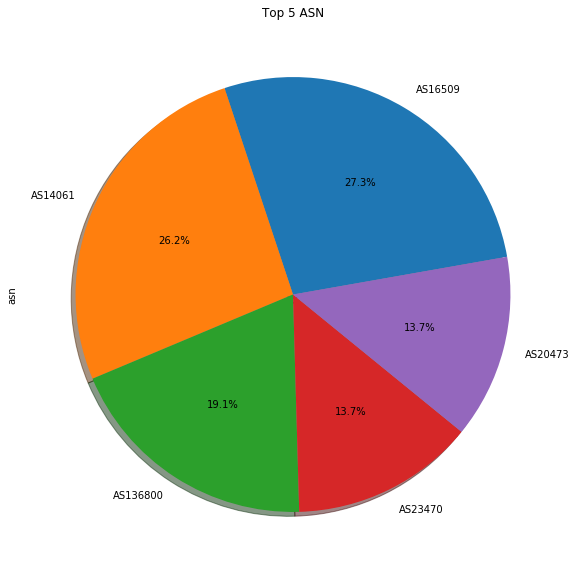

In [33]:
#plot a pie chart of the top 5 'asn' using 'nlargest(5)'
# df_json['org'].value_counts().nlargest(10).plot(kind='pie',figsize=[12,12])

df_json['asn'].value_counts().nlargest(5).plot.pie(title="Top 5 ASN", legend=False, autopct='%1.1f%%', explode=None, shadow=True, startangle=10, figsize=[10,10])

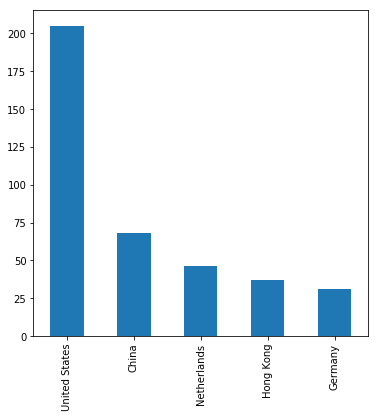

In [34]:
#plot a bar chart of the top 5 'Watermark' using 'nlargest(5)'
ax = df_json['country_name'].value_counts().nlargest(5).plot(kind='bar',figsize=[6,6])

In [35]:
#count by countries
df_json.groupby('country_name').size().reset_index(name='counts')


,country_name,counts
0,Australia,5
1,Belgium,1
2,Belize,3
3,Bulgaria,6
4,Canada,4
5,China,68
6,Czechia,3
7,Finland,6
8,France,11
9,Germany,31


In [36]:
# Top 10 organizations/hosting providers
df_json['org'].value_counts().nlargest(10).reset_index(name='counts')



,index,counts
0,AMAZON-02,50
1,DIGITALOCEAN-ASN,48
2,ICIDC NETWORK,35
3,RELIABLESITE,25
4,AS-CHOOPA,25
5,"Hangzhou Alibaba Advertising Co.,Ltd.",18
6,AMAZON-AES,15
7,LEASEWEB-USA-SFO-12,14
8,Shenzhen Tencent Computer Systems Company Limited,13
9,OVH SAS,12


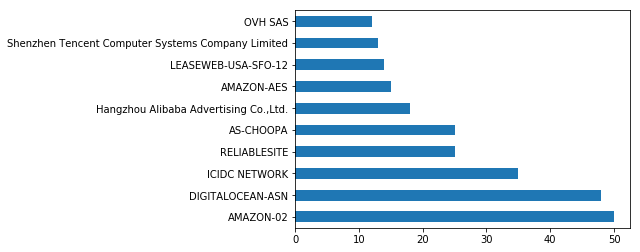

In [37]:
#Top 10 'org'

df_json['org'].value_counts().nlargest(10).plot.barh(stacked=True)

In [39]:
#decending count of "ip"
df_json['ip'].value_counts(ascending=False).reset_index(name='counts')



,index,counts
0,38.132.99.215,1
1,192.111.144.210,1
2,168.119.0.88,1
3,204.16.247.189,1
4,116.63.189.240,1
...,...,...
517,3.122.109.210,1
518,45.199.110.164,1
519,54.66.253.144,1
520,159.138.58.45,1


In [40]:
#if case all 'ip' values are unqiue, this is a quick check to confirm if there are any duplicates
df_json['ip'].duplicated().any()

False

In [41]:
# Show which city and postal code from each country is associated with the traffic
df_json.groupby(['country_name','city', 'postal']).size().reset_index(name='counts')

,country_name,city,postal,counts
0,Australia,Sydney,2000,5
1,Belgium,Brussels,1060,1
2,Bulgaria,Sofia,1000,2
3,Canada,Beauharnois,J6N,1
4,Canada,Montreal,H3G,1
...,...,...,...,...
119,United States,Washington,20010,1
120,United States,Washington,20011,1
121,United States,Washington,22747,2
122,United States,West Chicago,60185,1


In [42]:
df_json.groupby(['city', 'postal', 'ip']).count()

asn  continent_code  country  country_area  \
city      postal ip                                                            
Accokeek  20607  65.207.115.215     1               1        1             1   
Amsterdam 1012   146.0.72.91        1               1        1             1   
                 185.232.52.137     1               1        1             1   
                 185.232.52.41      1               1        1             1   
                 198.44.97.180      1               1        1             1   
...                               ...             ...      ...           ...   
Zurich    8045   179.43.156.87      1               1        1             1   
          8057   185.189.151.107    1               1        1             1   
Šiauliai  76001  213.252.247.202    1               1        1             1   
                 213.252.247.31     1               1        1             1   
                 213.252.247.66     1               1        1             1   

                                  country_calling_code  country_capital  \
city      postal ip                                                       
Accokeek  20607  65.207.115.215                      1                1   
Amsterdam 1012   146.0.72.91                         1                1   
                 185.232.52.137                      1                1   
                 185.232.52.41                       1                1   
                 198.44.97.180                       1                1   
...                                                ...              ...   
Zurich    8045   179.43.156.87                       1                1   
          8057   185.189.151.107                     1                1   
Šiauliai  76001  213.252.247.202                     1                1   
                 213.252.247.31                      1                1   
                 213.252.247.66                      1                1   

                                  country_code  country_code_iso3  \
city      postal ip                                                 
Accokeek  20607  65.207.115.215              1                  1   
Amsterdam 1012   146.0.72.91                 1                  1   
                 185.232.52.137              1                  1   
                 185.232.52.41               1                  1   
                 198.44.97.180               1                  1   
...                                        ...                ...   
Zurich    8045   179.43.156.87               1                  1   
          8057   185.189.151.107             1                  1   
Šiauliai  76001  213.252.247.202             1                  1   
                 213.252.247.31              1                  1   
                 213.252.247.66              1                  1   

                                  country_name  country_population  ...  \
city      postal ip                                                 ...   
Accokeek  20607  65.207.115.215              1                   1  ...   
Amsterdam 1012   146.0.72.91                 1                   1  ...   
                 185.232.52.137              1                   1  ...   
                 185.232.52.41               1                   1  ...   
                 198.44.97.180               1                   1  ...   
...                                        ...                 ...  ...   
Zurich    8045   179.43.156.87               1                   1  ...   
          8057   185.189.151.107             1                   1  ...   
Šiauliai  76001  213.252.247.202             1                   1  ...   
                 213.252.247.31              1                   1  ...   
                 213.252.247.66              1                   1  ...   

                                  languages  latitude  longitude  message  \
city      postal ip                                               

In [43]:
df_json.groupby(['country_name','city', 'postal', 'ip']).count()

asn  continent_code  \
country_name  city            postal ip                                     
Australia     Sydney          2000   13.211.237.247     1               1   
                                     13.211.255.53      1               1   
                                     3.26.14.83         1               1   
                                     54.253.227.154     1               1   
                                     54.66.253.144      1               1   
...                                                   ...             ...   
United States Washington      20011  38.100.141.131     1               1   
                              22747  23.101.141.164     1               1   
                                     40.117.40.46       1               1   
              West Chicago    60185  64.187.238.202     1               1   
              West Palm Beach 33411  192.111.144.210    1               1   

                                                      country  country_area  \
country_name  city            postal ip                                       
Australia     Sydney          2000   13.211.237.247         1             1   
                                     13.211.255.53          1             1   
                                     3.26.14.83             1             1   
                                     54.253.227.154         1             1   
                                     54.66.253.144          1             1   
...                                                       ...           ...   
United States Washington      20011  38.100.141.131         1             1   
                              22747  23.101.141.164         1             1   
                                     40.117.40.46           1             1   
              West Chicago    60185  64.187.238.202         1             1   
              West Palm Beach 33411  192.111.144.210        1             1   

                                                      country_calling_code  \
country_name  city            postal ip                                      
Australia     Sydney          2000   13.211.237.247                      1   
                                     13.211.255.53                       1   
                                     3.26.14.83                          1   
                                     54.253.227.154                      1   
                                     54.66.253.144                       1   
...                                                                    ...   
United States Washington      20011  38.100.141.131                      1   
                              22747  23.101.141.164                      1   
                                     40.117.40.46                        1   
              West Chicago    60185  64.187.238.202                      1   
              West Palm Beach 33411  192.111.144.210                     1   

                                                      country_capital  \
country_name  city            postal ip                                 
Australia     Sydney          2000   13.211.237.247                 1   
                                     13.211.255.53                  1   
                                     3.26.14.83                     1   
                                     54.253.227.154                 1   
                                     54.66.253.144                  1   
...                                                               ...   
United States Washington      20011  38.100.141.131                 1   
                              22747  23.101.141.164                 1   
                                     40.117.40.46                   1   
              West Chicago    60185  64.187.238.202                 1   
              West Palm Beach 33411  192.111.144.210                1   

                                                      count

In [44]:
df_json.groupby(['city', 'postal']).size()

city             postal
Accokeek         20607      1
Amsterdam        1012      11
                 1098       5
                 1101       1
                 1105       2
                           ..
West Palm Beach  33411      1
Woerden          3444       1
Zurich           8045       1
                 8057       1
Šiauliai         76001      3
Length: 124, dtype: int64